Refer here for the details of perceptron learning algorithm - https://en.wikipedia.org/wiki/Perceptron

In [150]:
import numpy as np

In [245]:
class Percepron(object):
    """ Parameters
     eta - learning rate
     n_iter - number of terations
     random weight initialization
     
     Attributes
     weight - 1d array 
     error - list 
     
     
     """
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state =1):
        self.eta = eta 
        self.n_iter = n_iter
        self.random_state = random_state
        
        
        
    def  fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.W = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        print(self.W)
        self.errors = []
        for i in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update  = self.eta * (target - self.predict(xi))
                self.W[1:] += update * xi
                self.W[0] += update
                errors += int(update != 0)
            self.errors.append(errors)
            
    def net_input(self,X):
        return np.dot(X, self.W[1:]) + self.W[0]
    
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0 ,1, -1)
        

# Training

In [246]:
import pandas as pd 

In [247]:
df = pd.read_csv("iris.data", header=None)

In [248]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [249]:
import matplotlib.pyplot as plt

In [250]:
y = df.iloc[1:101, 4].values
print(len(y))
y


100


array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       '

In [251]:
y = np.where( y == 'Iris-Setosa', -1,1)

In [252]:
y.shape

(100,)

In [253]:
X = df.iloc[1:101, [0,2]].values
X[0]

array([4.9, 1.4])

In [254]:
X.shape

(100, 2)

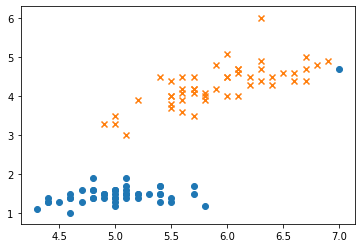

In [255]:
plt.scatter(X[:50, 0], X[:50,1], label = 'setosa', marker ='o')
plt.scatter(X[50:100, 0], X[50:100, 1], label = 'versicolor', marker ='x')

In [261]:
perceptron = Percepron(eta = 0.1, n_iter =10)
perceptron.fit(X, y)


[ 0.01624345 -0.00611756 -0.00528172]


# From Scikit Learn Package

In [1]:
from sklearn.datasets import load_iris


In [2]:
iris = load_iris()

In [4]:
X = iris.data[:, [2,3]]


In [5]:
y = iris.target

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =1, stratify = y)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()

In [11]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [16]:
from sklearn.linear_model import Perceptron

In [19]:
ppn = Perceptron(max_iter = 40,  alpha= 0.01, random_state =1)

In [20]:
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.01, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
y_pred = ppn.predict(X_test_std)

In [22]:
y_pred

array([2, 0, 0, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 1, 2, 2, 1, 2, 2, 0,
       1, 2, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 2, 0,
       0])

In [23]:
print("misclassification:", (y_test != y_pred).sum())

misclassification: 5


In [25]:
from sklearn.metrics import accuracy_score

In [26]:
print('Accuracr: %.2f' % accuracy_score(y_test, y_pred))

Accuracr: 0.89
